## Module 3: Assignment 1 - Data Quality Assessment and Preparation of Wine Dataset by Group 2
Jyothi K Vishwanath 
Praveen Maranur 
Niyanta Pandey 
Dheeraj Shankar



### Introduction

The task is to explore and clean a wine dataset that poses several data integrity and usability challenges. This dataset contains information on over 12,700 wines, focusing on attributes related to their chemical composition. It presents multiple issues, including inconsistencies, missing values, and potential inaccuracies.

Our goal is to systematically clean and preprocess the dataset to improve its suitability for machine learning applications. We will start with Exploratory Data Analysis (EDA) to identify and assess data quality problems. Following this, we will apply various data cleaning techniques, such as handling missing values, correcting erroneous data, and ensuring feature consistency.

After completing the cleaning process, we will assess the dataset's readiness for further analysis and model training. This thorough approach will ensure a high-quality dataset, laying the groundwork for generating reliable insights and achieving strong predictive performance.

### Steps to Solve the Problem:

1. **Exploratory Data Analysis (EDA)**: Perform EDA, assess the issues currently present in the data, and clean and prepare the data for machine learning.
2. **Data Preparation**: Handle missing values and perform statistical transformations based on domain knowledge.
3. **Prepped Data Review**: Address data integrity and usability issues.
4. **Conclusion**: Provide a summary of findings and the impact of our data preparation.

### Our Approach

The following steps, from Exploratory Data Analysis (EDA) to data preparation, were carried out for each column in the dataset:

* **Exploratory Data Analysis (EDA)**
* **Data Preparation**


## Importing necessary libraries

In [2]:
#Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### Data Loading from GitHub


In [3]:
#Load the dataset and quick look at the data.
df = pd.read_csv('https://raw.githubusercontent.com/jk-vishwanath/DAV-6150/main/M3_Data%20(1).csv') # github link where dataset is loaded
df.head() # displays first 5 rows of dataset

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


### Dataset Dimensions

In [4]:
print(f'Number of rows = {df.shape[0]}, columns ={df.shape[1]} ')  # Total Number of rows and columns   : There are 12795 rows and 17 columns

Number of rows = 12795, columns =17 


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

### Key Observations

1. Most features are stored as float64, with a few int64 columns.
2. Several columns have missing values, with 'STARS' having the most (3,359 missing).
3. 'LabelAppeal', and 'AcidIndex' might be categorical variables.
4. There are no string or object columns, suggesting all data is numeric.

In [6]:
#Summary statistics
df.describe()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,6397.000000,8069.980305,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,2.041755
std,3693.742682,4656.905107,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.902540
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,1.000000
25%,3198.500000,4037.500000,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,1.000000
50%,6397.000000,8110.000000,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,2.000000
75%,9595.500000,12106.500000,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,3.000000
max,12794.000000,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


### Statistical Summary

1. **Target Variable (TARGET)**: The average number of cases sold is approximately **3.03**, with a maximum of **8.00** and a minimum of **0.00** .

2. **Acidity Levels**:The mean fixed acidity is around **8.06**, with values ranging from **0.00** to **34.40** while for
   **VolatileAcidity** the average is **0.64** .

3. **Sugar Content**: The mean **ResidualSugar** is **0.69**, with some wines having very low sugar levels and others reaching **3.86**.

4. **Chemical Composition**: The pH values have a mean of approximately **3.21**, with a minimum of **0.88** and a maximum of **1.10**.

5. **Sulfate and Alcohol Content**: **Sulphates** have a mean of **0.85**, while the average alcohol content is around **10.52%**.

6. **Label Appeal and Ratings**: The **LabelAppeal** column has an average score of **0.00** (with a range of **-2.0** to **1.0**), indicating that the subjective ratings may vary significantly. The average **STARS** rating of **2.04** suggests that there is room for improvement in wine quality as perceived by experts.

In [7]:
# number of unique variables in column 'Unnamed:0' and "INDEX"
df.iloc[:,[0,1]].nunique()

,0
Unnamed: 0,12795
INDEX,12795


In above case both column 'Unnamed: 0' and 'INDEX' have 12795 unique values. Hence, we are going to drop these above columns.

In [8]:

df = df.iloc[:,2:]
df.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [9]:
#Calculate the number of missing values
def null_sum(df):
  df1 = df.isnull().sum()
  return df1[df1>0]


#Calculate the percentage of missing values in the columns
def null_percent(df):
  return round((null_sum(df)/df.shape[0])*100,2)

In [10]:
#To view the total null vales in each feature.
null_sum(df)

,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
pH,395
Sulphates,1210
Alcohol,653
STARS,3359


In [11]:
# Columns containing missing values
missing_value_columns = null_percent(df)[null_percent(df) > 0].index
missing_value_columns

Index(['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'pH', 'Sulphates', 'Alcohol', 'STARS'],
      dtype='object')

In [12]:
#To view percentage of null values.
null_percent(df)

,0
ResidualSugar,4.81
Chlorides,4.99
FreeSulfurDioxide,5.06
TotalSulfurDioxide,5.33
pH,3.09
Sulphates,9.46
Alcohol,5.10
STARS,26.25


In [13]:
df.columns

Index(['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
       'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide',
       'Density', 'pH', 'Sulphates', 'Alcohol', 'LabelAppeal', 'AcidIndex',
       'STARS'],
      dtype='object')

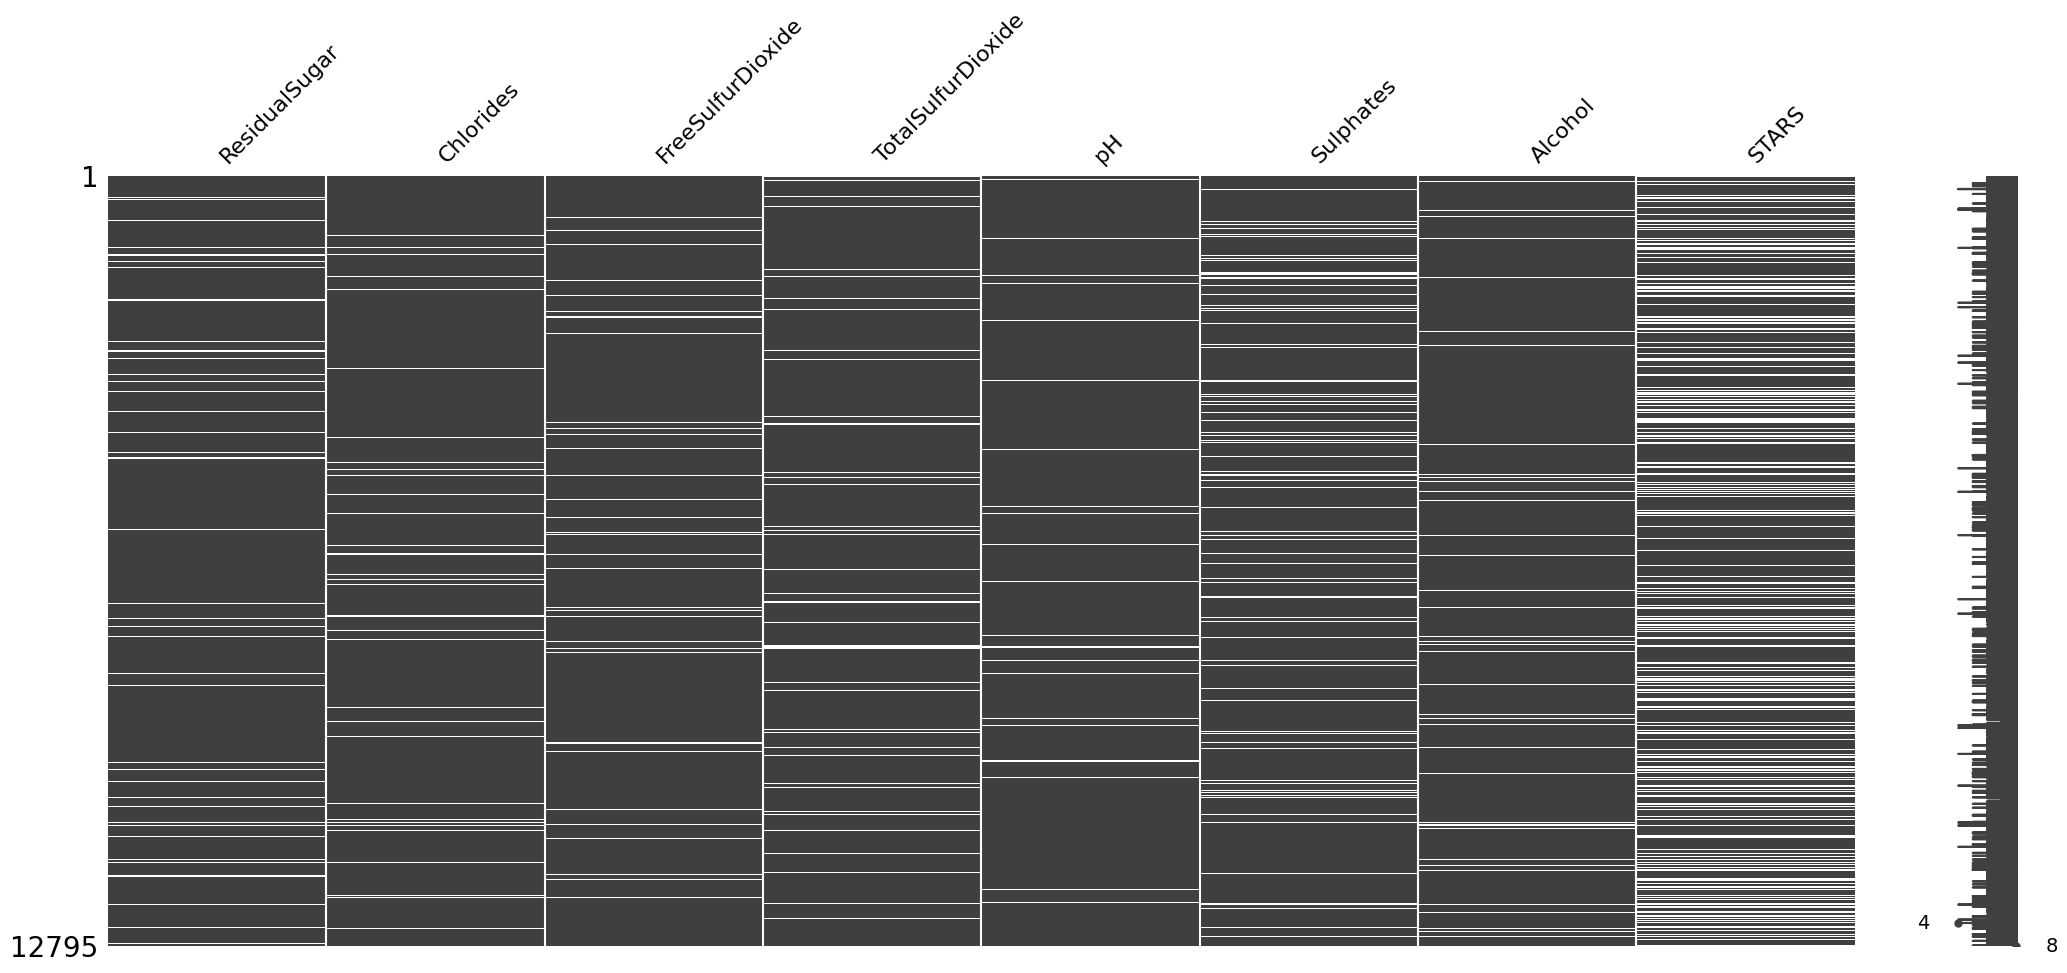

In [14]:
#Missing value matrix.
import missingno as msno
missing_value_columns
ax = msno.matrix(df[missing_value_columns])

Based on our analysis of missing values, which included calculating the percentage of missing data and plotting a matrix, we identified the following findings:

1. **STARS** has the highest proportion of missing values, with 26.25% of the rows in the 'stars' column containing missing data.
2. Several columns exhibit moderately missing data, including:
   - **Sulphates**: 9.46%
   - **Total Sulfur Dioxide**: 5.33%
   - **Alcohol**: 5.10%
   - **Free Sulfur Dioxide**: 5.06%
3. Other variables, such as **chlorides**, **residual sugar**, and **pH**, show fewer missing entries.

Variables like **Acid Index** have negligible or no missing data. Addressing these missing values will be crucial to ensure the integrity of the analysis, potentially through imputation methods or by removing records with excessive missingness.


In [15]:
#Drop the duplicates if there are any in the dataset
df.drop_duplicates(keep='first', inplace=True)

In [16]:
len(df)

12795

There are no Duplicate rows!

In [17]:
# To understand the correlation of independant variables with the target variable.
df.corr()['TARGET'].sort_values()

,TARGET
AcidIndex,-0.246049
VolatileAcidity,-0.070195
FixedAcidity,-0.052984
Density,-0.035518
Sulphates,-0.035259
Chlorides,-0.028463
pH,-0.009445
ResidualSugar,0.003645
CitricAcid,0.013953
FreeSulfurDioxide,0.024503


###  EDA and Data Preparation on **Stars Column**

In [18]:
# STATS has more than 20% missing values.
df[['TARGET','STARS']].corr()

,TARGET,STARS
TARGET,1.000000,0.558794
STARS,0.558794,1.000000


In [19]:
#To view the unique values of the column.
df.STARS.unique()

array([ 2.,  3.,  1., nan,  4.])

In [20]:
#Replacing Null Values With "Missing Value"
df.STARS = df.STARS.astype('string')
df.STARS.fillna("Missing_Value", inplace = True)
df.STARS.unique()

<StringArray>
['2.0', '3.0', '1.0', 'Missing_Value', '4.0']
Length: 5, dtype: string

### Prepped Data Review for STARS

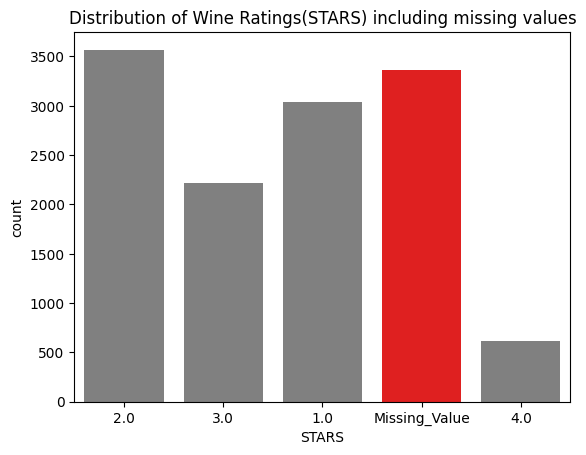

In [21]:
sns_plot=sns.countplot(data=df,x='STARS', palette={'Missing_Value': 'red', '1.0': 'grey','2.0': 'grey','3.0': 'grey','4.0': 'grey'});
sns_plot.set_title('Distribution of Wine Ratings(STARS) including missing values');
plt.show()

In [22]:
df[df.STARS == "Missing_Value"].TARGET.value_counts()

,count
TARGET,
0,2038
3,457
2,335
4,260
1,126
5,101
6,32
7,8
8,2


We could infer from data dictionary that 'Stars' column signifies Wine rating as determined by experts (4 = excellent; 1 =
Poor. Now here in this case we believe the missing values indicates the rating is not done for a particular wine. Therefore, we want to introduce that as a new category called 'Not rated'.

In [23]:
# Mapping the STARS column for increasing the readability of the data.
df.STARS = df.STARS.map({'Missing_Value': 'Not_Rated', '1.0': '1_Star','2.0': '2_Star','3.0': '3_Star','4.0': '4_Star'})
df.STARS.unique()

array(['2_Star', '3_Star', '1_Star', 'Not_Rated', '4_Star'], dtype=object)

### One Hot Encoding on **STARS**



The STARS column represents a ranked categorical variable for wine quality, where:
- 1 star = Poor
- 2 stars = Average
- 3 stars = Good
- 4 stars = Excellent
- Missing values = Not Rated (wines not evaluated by experts)

To prepare this data for analysis, we're transforming the STARS column into a binary matrix using one-hot encoding. This conversion will create separate columns for each rating category, allowing for more effective use in statistical models and machine learning algorithms.

In [24]:
star_dummies = pd.get_dummies(df['STARS'])
star_dummies = star_dummies.astype(int)
df = pd.concat([df, star_dummies], axis=1)


# Dropping STARS and Not_Rated columns
df.drop(['STARS','Not_Rated'], axis = 1, inplace = True)

df.describe()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,1_Star,2_Star,3_Star,4_Star
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000
mean,3.029074,8.063251,0.641086,0.686315,23.367809,0.222559,106.679042,204.319120,0.994203,3.207628,0.846668,10.523778,-0.009066,7.772724,0.237749,0.279015,0.172880,0.047831
std,1.926368,4.996119,0.555614,0.606005,24.945667,0.234288,108.102694,163.116881,0.026538,0.679687,0.655612,3.629154,0.891089,1.323926,0.425721,0.448533,0.378158,0.213417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.888090,0.480000,0.000000,0.000000,-2.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.600000,0.250000,0.280000,3.600000,0.046000,28.000000,100.000000,0.987720,2.960000,0.430000,9.000000,-1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,7.000000,0.410000,0.440000,12.900000,0.098000,56.000000,154.000000,0.994490,3.200000,0.590000,10.400000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,9.800000,0.910000,0.970000,38.700000,0.368000,172.000000,262.000000,1.000515,3.470000,1.100000,12.400000,1.000000,8.000000,0.000000,1.000000,0.000000,0.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,1.000000,1.000000,1.000000,1.000000


#### To view the sum of null values in remaining columns

In [25]:

missing_value_columns = list(missing_value_columns)
missing_value_columns.remove('STARS')
null_sum(df[missing_value_columns])

,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
pH,395
Sulphates,1210
Alcohol,653


### EDA and data preparation on Sulphates column

In [26]:
#To plot correlation matrix of all columns with null value and the target variable.
l = list(null_sum(df)[null_sum(df)>0].index)
l.append("TARGET")
df[l].corr()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,TARGET
ResidualSugar,1.000000,-0.002837,-0.007418,0.014476,0.001203,-0.007658,-0.006927,0.003645
Chlorides,-0.002837,1.000000,-0.004884,-0.015316,0.008080,0.021366,-0.001174,-0.028463
FreeSulfurDioxide,-0.007418,-0.004884,1.000000,0.014710,-0.006287,-0.002096,-0.011384,0.024503
TotalSulfurDioxide,0.014476,-0.015316,0.014710,1.000000,0.010575,-0.010995,-0.033102,0.035253
pH,0.001203,0.008080,-0.006287,0.010575,1.000000,0.013386,-0.009365,-0.009445
Sulphates,-0.007658,0.021366,-0.002096,-0.010995,0.013386,1.000000,0.000251,-0.035259
Alcohol,-0.006927,-0.001174,-0.011384,-0.033102,-0.009365,0.000251,1.000000,0.063394
TARGET,0.003645,-0.028463,0.024503,0.035253,-0.009445,-0.035259,0.063394,1.000000


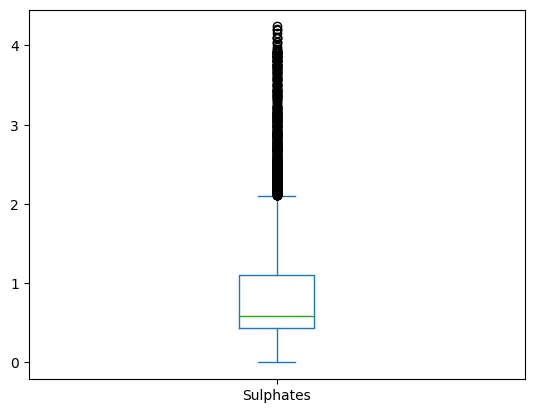

In [27]:
#To show box plot of sulphate variable
df.Sulphates.plot.box();

### Box Plot Analysis: Sulphates in Wine Samples


- **Median**: ~0.6
- **IQR**: Q1 ~0.4, Q3 ~1.1, representing the middle 50% of values.
- **Whiskers**: Stretch from ~0 to ~2.1, covering most data points.
- **Outliers**: Many outliers above ~2.1, reaching up to ~4.3.
- **Distribution**: Right-skewed due to high outliers; bulk of data falls between 0.4 and 1.1.
- **Range**: Data spans from ~0 (excluding outliers) to ~4.3 (including outliers).


In [28]:
# To calculate mean of the data
np.mean(df[~df.Sulphates.isna()].Sulphates)

0.8466681053085887

In [29]:
# TO calculate median of the data
np.median(df[~df.Sulphates.isna()].Sulphates)

0.59

In [30]:
# Calculate IQR for Sulphates
Q1 = df['Sulphates'].quantile(0.25)
Q3 = df['Sulphates'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [31]:
# Replace the outlier values with capped values using IQR.
df['Sulphates'] = df['Sulphates'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


### Prepped Data Review for Sulphates

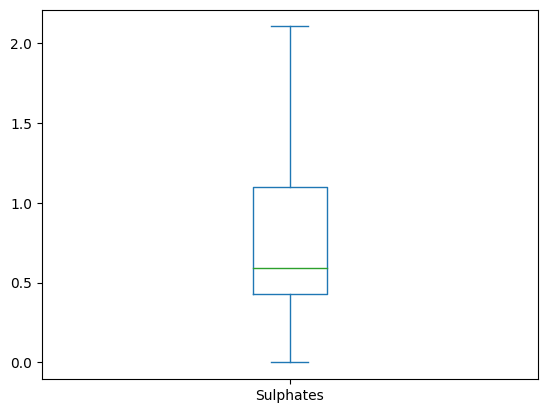

In [32]:
#To show box plot of sulphate variable after Null Value Imputation
df.Sulphates.plot.box();

Below mentioned are the insights based on the above box plot distribution:

*   The median is around 0.65.
*   The IQR lies between approximately 0.55 and 1.0 indicating the middle 50% of data.
*   The distibution is better than the original one as the outliers have now been capped and it is closer to normal distribution.




#### Replacing the null values with median value

In [33]:
df.Sulphates.fillna(np.median(df[~df.Sulphates.isna()].Sulphates), inplace = True)

In [34]:
# To view sum of null values in remaining columns and to select the next column based on highest missing values
null_sum(df)

,0
ResidualSugar,616
Chlorides,638
FreeSulfurDioxide,647
TotalSulfurDioxide,682
pH,395
Alcohol,653


### Relationship between FreesulfurDioxide and Totalsulfurdioxide based on domain knowledge

In wine, "free sulfur dioxide" is the portion that is unbound and reactive, while "total sulfur dioxide" includes both free and bound forms (the total amount present).

In [35]:
# To view the number of records where the value of 'FreeShulfurDioxide' is greater than the 'TotalSulfurDioxide'.
df[df['FreeSulfurDioxide'] > df.TotalSulfurDioxide][['FreeSulfurDioxide','TotalSulfurDioxide']]

,FreeSulfurDioxide,TotalSulfurDioxide
2,214.0,142.0
4,167.0,108.0
5,37.0,15.0
6,287.0,156.0
10,551.0,65.0
...,...,...
12767,164.0,41.0
12768,173.0,160.0
12771,204.0,157.0
12786,228.0,29.0


**Data Integrity Issue**: 3,063 records have FreeSulfurDioxide exceeding TotalSulfurDioxide.
**Action Plan**:Remove the FreeSulfurDioxide column.

#### Next Steps

- Median imputation for TotalSulfurDioxide missing values.
- Log transformation for normalization.


In [36]:
df['TotalSulfurDioxide'].describe()

,TotalSulfurDioxide
count,12113.000000
mean,204.319120
std,163.116881
min,0.000000
25%,100.000000
50%,154.000000
75%,262.000000
max,1057.000000


<Axes: >

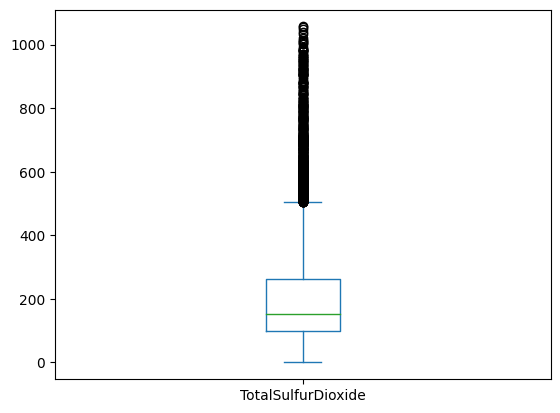

In [37]:
#Box plot to understand the distribution of totalsulfurdioxide column.
df['TotalSulfurDioxide'].plot.box()

Below mentioned are the insights that we could deduce based on the box plot showing distribution of TotalSulfurDioxide:

*   The boxplot shows TotalSulfurDioxide has a right-skewed distribution with many outliers above 600, indicating a non-normal distribution.
*   A log transformation can be applied to normalize the skewness, making the data more suitable for further statistical analysis and modeling.
*   Median imputation can be used to handle missing values, ensuring that extreme values or outliers do not disproportionately affect the imputed values.




In [38]:
#Imputing the missing values by median to maintain data consistency.
df.TotalSulfurDioxide.fillna(df.TotalSulfurDioxide.median(), inplace = True)

In [39]:
# Dropping Freesulfurdioxide column and using log transformation for totalsulfurdioxide.
df.drop('FreeSulfurDioxide', axis = 1, inplace = True)
df['TotalSulfurDioxide_log'] = np.log1p(df['TotalSulfurDioxide'])
df.drop('TotalSulfurDioxide', axis = 1, inplace = True)

### Prepped Data Review for TotalSulfurDioxide

<Axes: xlabel='TotalSulfurDioxide_log', ylabel='Count'>

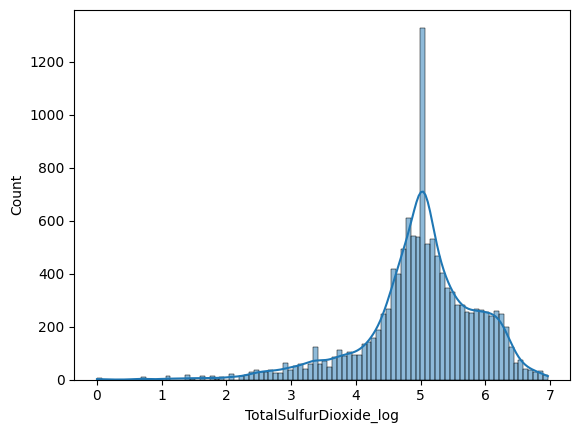

In [40]:
sns.histplot(df['TotalSulfurDioxide_log'], kde=True)

The above histogram shows the distribution of TotalSulfurDioxide after the median value imputation and log transformation. Below mentioned insights could be deduced from this:

*   The log transformation has somewhat reduced the original skewness and its now closer to normal distribution but still a little bit right skewed.
*   The data is now dense between 4-6 making it more reliable for modelling purpose.



### EDA and Data Preparation for Residual Sugar

Residual Sugar is a critical component in wine that refers to the amount of natural sugar remaining in the wine after fermentation. During the fermentation process, yeast consumes the sugar present in the grape juice and converts it into alcohol.

In [41]:
# To view the null values present in the column.
df['ResidualSugar'].isnull().sum()

616

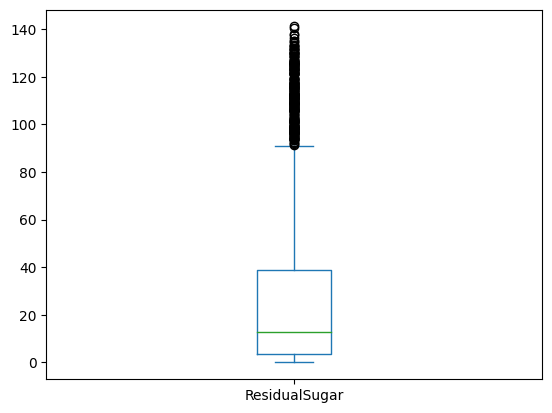

In [42]:
#To view the distribution using box plot.
df.ResidualSugar.plot.box();


The boxplot shows that there are several high outliers, especially abovethe value of 40 for residual sugar. These outliers stretch far beyond the upper whisker, indicating an extremely skewed distribution.


<Axes: xlabel='ResidualSugar', ylabel='Count'>

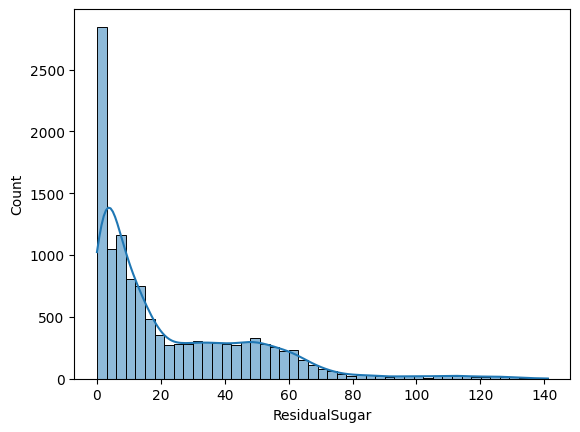

In [43]:
sns.histplot(df['ResidualSugar'], kde=True)




*   The skewness is apparent, with the majority of values clustered at lower ranges, suggesting right skew.
*   The long tail in the histogram matches the outliers seen in the boxplot. There are fewer but significant data points in the higher range, contributing to the overall skew.



In [44]:
df.ResidualSugar.fillna(np.median(df[~df.ResidualSugar.isna()].ResidualSugar), inplace = True)

*   The median is robust to outliers, making it an ideal method for handling missing values in highly skewed data like the "ResidualSugar" variable.


<Axes: xlabel='ResidualSugar', ylabel='Count'>

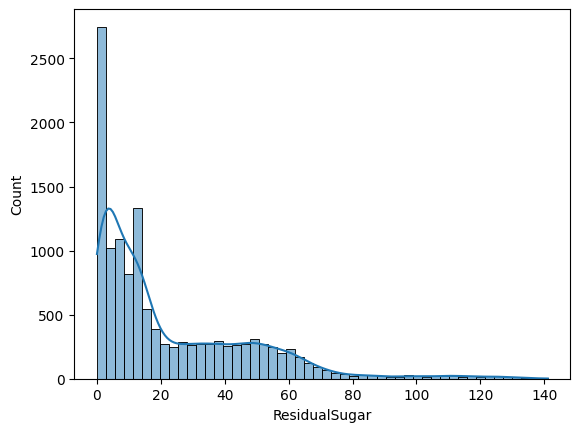

In [45]:
sns.histplot(df['ResidualSugar'], kde=True)

*   Given the right-skewed distribution of residual sugar, a log transformation helps in normalizing the data by compressing the long tail of high values.

In [46]:
df['ResidualSugar_log'] = np.log1p(df['ResidualSugar'])

## Prepped Data Review of ResidualSugar

<Axes: xlabel='ResidualSugar_log', ylabel='Count'>

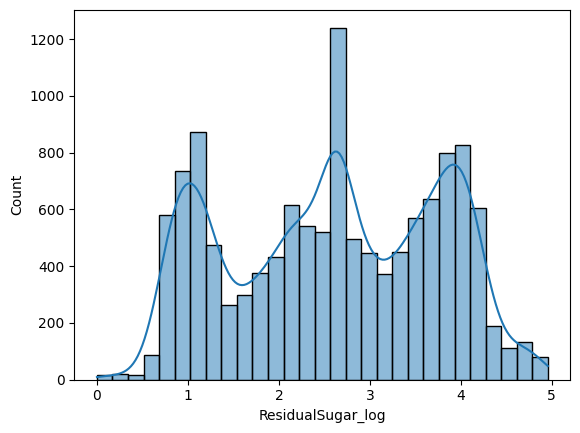

In [47]:
sns.histplot(df['ResidualSugar_log'], kde=True)

Below mentioned are insights based on the above plot:


*   The data appears more symmetrically distributed compared to the original, with multiple peaks indicating a multimodal distribution.
*   The log transformation has successfully compressed the high values, reducing the right skewness observed in the original data.
*   The transformation has spread the lower residual sugar values more evenly across bins, providing a clearer representation of the overall variability.







In [48]:
df[["ResidualSugar_log",'ResidualSugar','TARGET']].corr()

,ResidualSugar_log,ResidualSugar,TARGET
ResidualSugar_log,1.000000,0.881362,0.019274
ResidualSugar,0.881362,1.000000,0.002510
TARGET,0.019274,0.002510,1.000000



Therefore, now we can drop the original column 'ResidualSugar' as the log-transformed column 'ResidualSugar_log' provides a more normalized and stable distribution, making it more suitable for statistical analysis and modeling.

In [49]:
# Dropping the original ResidualSugar column.
df.drop('ResidualSugar', axis = 1, inplace = True)

In [50]:
#checking for null values in the dataset
null_sum(df)

,0
Chlorides,638
pH,395
Alcohol,653


### EDA and data preparation on Alcohol

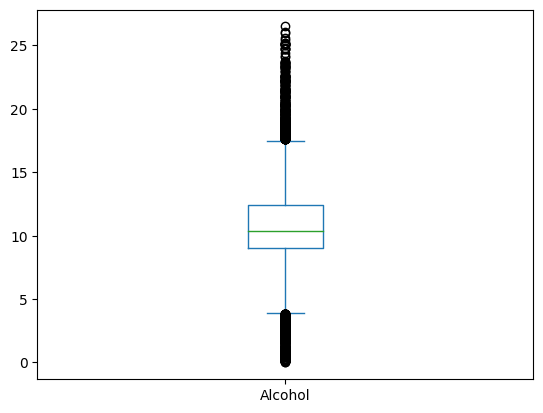

In [51]:
df.Alcohol.plot.box();

By analyzing the wine dataset's alcohol content using a box plot, we observed that the median alcohol level is approximately 11%.

<Axes: xlabel='Alcohol', ylabel='Count'>

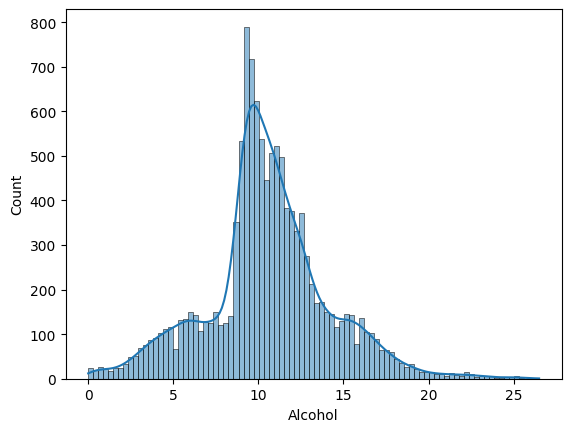

In [52]:
sns.histplot(df['Alcohol'], kde=True)


The histogram of alcohol content in the wine dataset shows a right-skewed distribution, with most wines around the 8-9% range, suggesting lighter wines are more common. However, a few wines have higher alcohol content, pointing to a variety of styles.

### Prepped Data Review for Alcohol

<Axes: xlabel='Alcohol', ylabel='Count'>

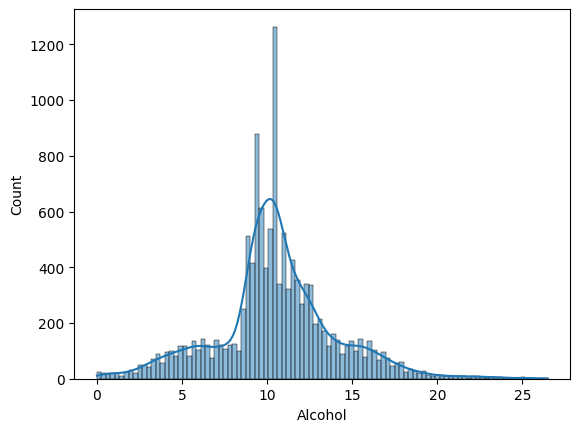

In [53]:
df.Alcohol.fillna(np.median(df[~df.Alcohol.isna()].Alcohol), inplace = True)
sns.histplot(df['Alcohol'], kde=True)


Now, after the imputation, the peak of the distribution occurs around the 11-12% alcohol range, suggesting this is the most common alcohol content for wines in the dataset.

### Standardization of Alcohol Content

This code standardizes the alcohol content in the dataset using `StandardScaler`, which transforms the values to have a mean of 0 and a standard deviation of 1. By creating a new column, `Alcohol_StdScalar`, the original 'Alcohol' column is removed for clarity.

<Axes: xlabel='Alcohol_StdScalar', ylabel='Count'>

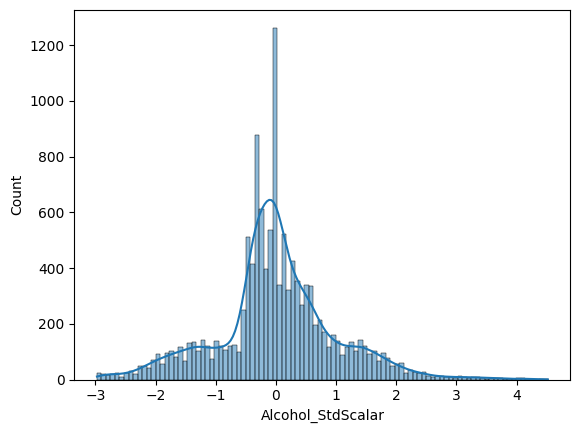

In [54]:
scaler = StandardScaler()
df['Alcohol_StdScalar'] = scaler.fit_transform(df[['Alcohol']]).flatten()
df.drop('Alcohol', axis = 1, inplace = True)
sns.histplot(df['Alcohol_StdScalar'], kde=True)


The range of -3 to 4 on the y-axis of the histogram reflects standard scaling of the standardized alcohol content, indicating how far each wine's alcohol level is from the average.

In [55]:
#checking the null values for missing data
null_sum(df)

,0
Chlorides,638
pH,395


### EDA and data preparation for Chloride

Chlorides in wine refer to the concentration of chloride ions (Cl⁻), which mainly come from sodium chloride (table salt) or other salts present during the winemaking process. While chloride levels in wine are usually very low, they can significantly impact the wine's taste and stability.

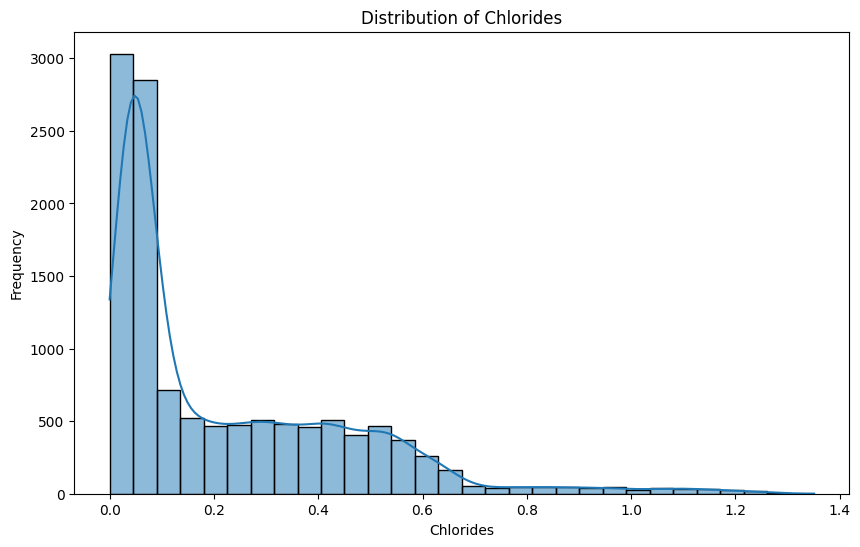

In [56]:
# Histogram for Chlorides
plt.figure(figsize=(10, 6))
sns.histplot(df['Chlorides'], kde=True, bins=30)
plt.title('Distribution of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()


The histogram shows a right-skewed distribution of chlorides in the wine dataset. Most wines have chloride levels concentrated around 0.0 to 0.10, indicating this range is the most common. The right tail reveals a few wines with significantly higher levels. The y-axis indicates the frequency of wines, decreasing as chloride levels increase, while the x-axis ranges from 0 to 1.4, visually representing the density of wines across different chloride levels.

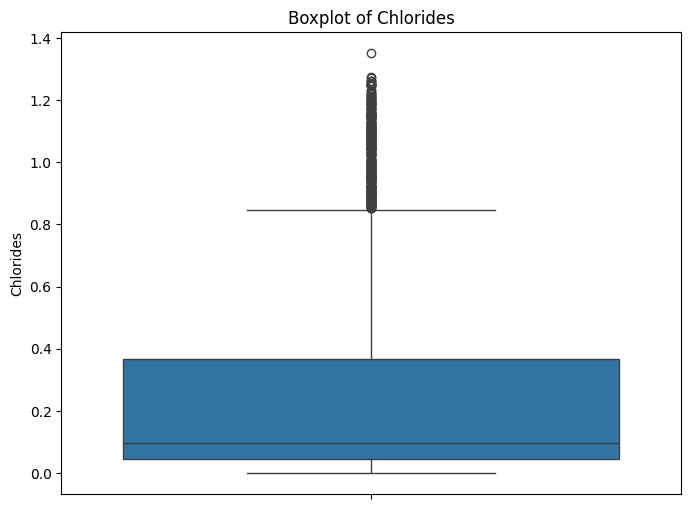

In [57]:

# Boxplot for Chlorides
plt.figure(figsize=(8, 6))
sns.boxplot(df['Chlorides'])
plt.title('Boxplot of Chlorides')
plt.show()


The small interquartile range (IQR) indicates that most wines have similar chloride content, which is important for quality control. However, one outlier with a high chloride level needs further investigation for potential issues. The right-skewed distribution suggests that while most wines have lower chloride levels, a few have much higher levels, which could impact taste and stability.

In [58]:
# Filling missing values in Chlorides with median
df['Chlorides'].fillna(df['Chlorides'].median(), inplace=True)

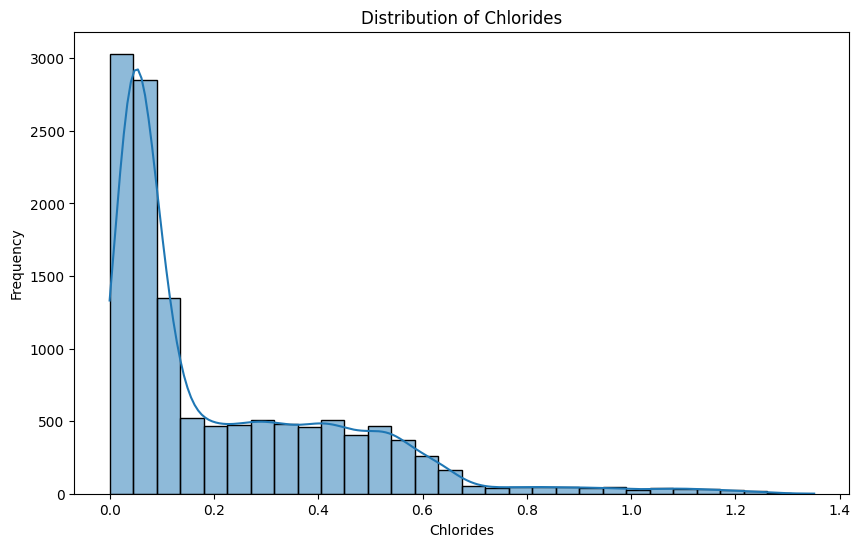

In [59]:
# Histogram for Chlorides after filling null values
plt.figure(figsize=(10, 6))
sns.histplot(df['Chlorides'], kde=True, bins=30)
plt.title('Distribution of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()

The acceptable chloride range in wine typically falls below 0.1 g/L, as levels exceeding this can negatively impact taste, leading to salty or undesirable flavors. In our dataset, the histogram indicates that most wines are concentrated around 0.05-0.10 g/L, suggesting that a significant portion is within the acceptable range.

However, the presence of outlier wines with higher chloride levels in the right tail of the distribution raises potential quality concerns, especially if any exceed 0.1 g/L.

In [60]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Check if there are any zero or negative values in Chlorides and if it has then BOX-COX cannot be applied
print(f"Minimum value in Chlorides: {df['Chlorides'].min()}")


Minimum value in Chlorides: 0.0


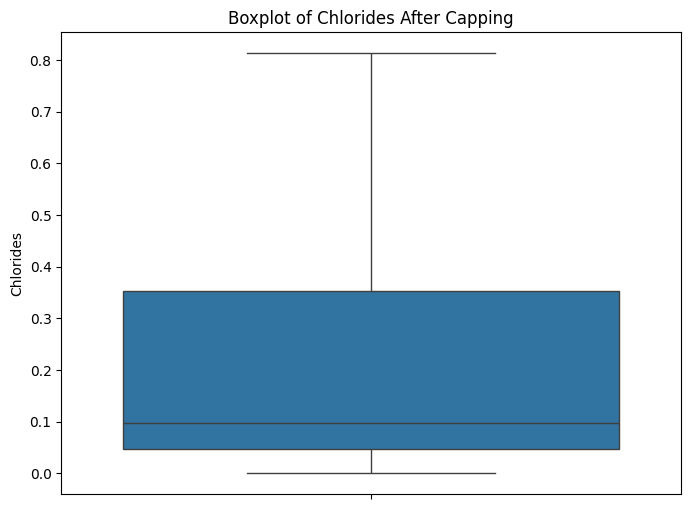

In [61]:
# Calculate IQR for Chlorides
Q1 = df['Chlorides'].quantile(0.25)
Q3 = df['Chlorides'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for capping
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Chlorides'] = df['Chlorides'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Check if outliers have been capped
plt.figure(figsize=(8, 6))
sns.boxplot(df['Chlorides'])
plt.title('Boxplot of Chlorides After Capping')
plt.show()

All the outliers have now been capped to the value of the upper whisker. Therfore, after performing outlier treatment, the data for the column looks more stable and usable for model training.

In [62]:
null_sum(df)

,0
pH,395


### Prepped Data Review for Chlorides

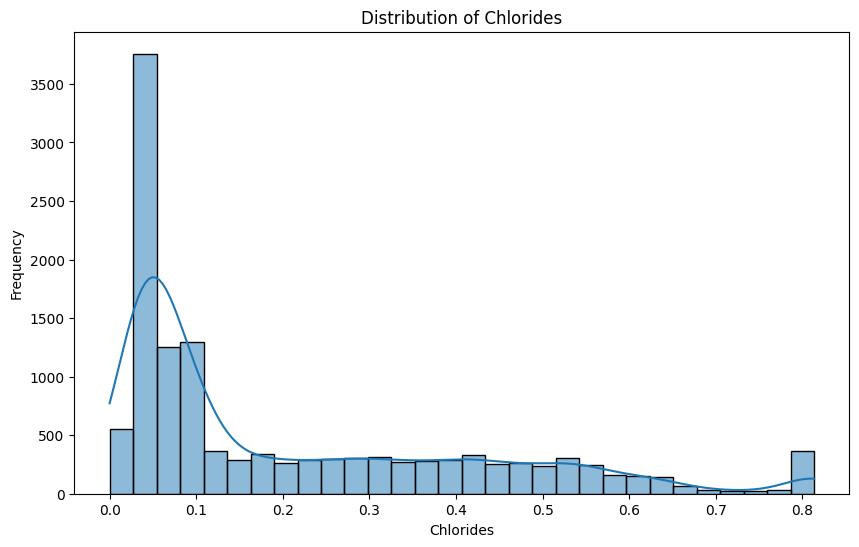

In [63]:
# Histogram for Chlorides
plt.figure(figsize=(10, 6))
sns.histplot(df['Chlorides'], kde=True, bins=30)
plt.title('Distribution of Chlorides')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.show()

Now, the skewness has been reduced after capping outliers.

### EDA and Data Preparation of pH

pH is a measure of the acidity or basicity (alkalinity) of a solution, and in the context of wine, it plays a crucial role in determining the wine’s taste, stability, and aging potential.

**Typical pH Range of Wine:**

*   **White Wines:** pH range of 3.0 to 3.4.
*   **Red Wines:** pH range of 3.0 to 3.4.
*   **Rosé Wines:** pH range 3.1 to 3.4.

A lower pH means the wine is **more acidic**, while a higher pH means the wine is less acidic or more alkaline.




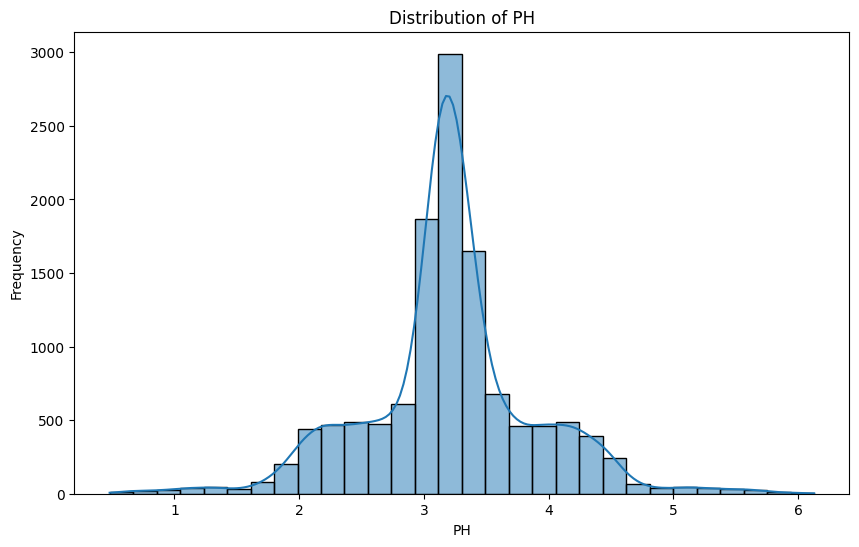

In [64]:
# Histogram for pH
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True, bins=30)
plt.title('Distribution of PH')
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.show()

[Research](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10489813/#:~:text=However%2C%20it%20also%20contains%20alcohol,%2Fcm3%20%5B31%5D.) indicates that pH values below 2 or above 4.5 are considered unsafe.


In [65]:
l1 = list(df.pH[df.pH < 2])
l2 = list(df.pH[df.pH > 4.5])
df.pH.replace(l1 , 2.0, inplace = True)
df.pH.replace(l2 , 4.5, inplace = True)

### Prepped Data Review for PH

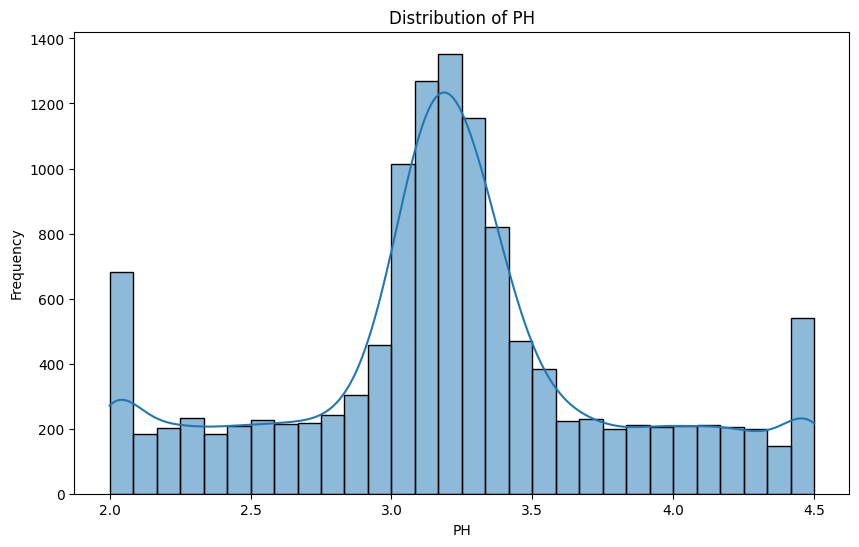

In [66]:
# Histogram for pH
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True, bins=30)
plt.title('Distribution of PH')
plt.xlabel('PH')
plt.ylabel('Frequency')
plt.show()


The above histogram depicts the distribution of pH values in the wine dataset after outlier treatment. This graph is the result of modifications made to address extreme pH values.

### Key Observations

- The pH range now spans from 2.0 to 4.5, compared to the wider range (approximately 1 to 6) in the original distribution.
- Based on our findings we found that the pH of wine ranges between 2.5-4.5. So we replaced values below 2.0 with 2.0, and values above 4.5 with 4.5.
- The core of the distribution maintains a roughly normal shape, centered around pH 3.0-3.2.
- This treatment has effectively bounded the pH values within a more realistic range for wines.
- While preserving the overall shape of the distribution, it has created artificial concentrations at the extremes, which should be considered in any subsequent analysis.

In [67]:
# replacing missing values from pH column from median
df['pH'].fillna(df['pH'].median(), inplace=True)

In [68]:
#Checking for null values in tne dataset
null_sum(df)

,0


All the missing values are treated and transformed accordingly.

### EDA and Data Preparation on Acidindex

The acid index in wine refers to the measure of acidity in the wine, which is crucial for its flavor, balance, and aging potential.

In [69]:
from scipy import stats

# Step 1: Check if AcidIndex has any non-positive values
min_value = df['AcidIndex'].min()
print(f"Minimum value in AcidIndex: {min_value}")

Minimum value in AcidIndex: 4


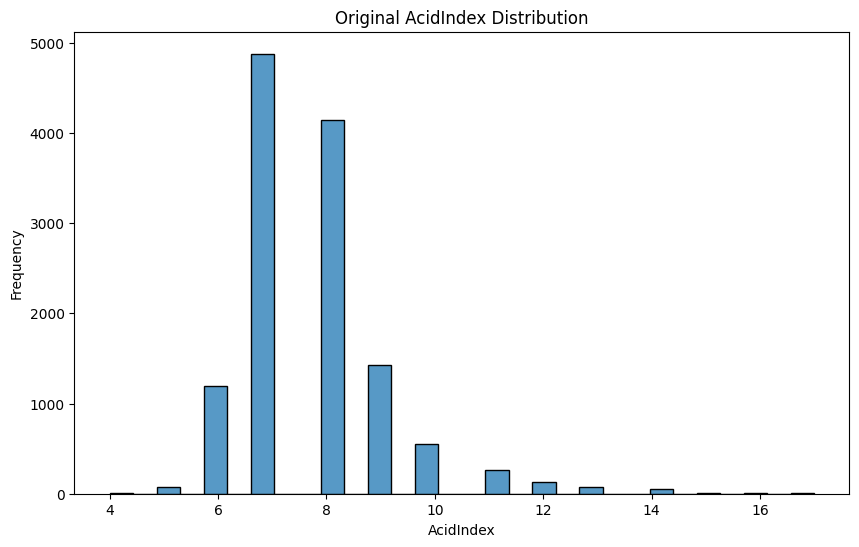

In [70]:
# Step 2: Apply Box-Cox transformation on the shifted AcidIndex column
acidindex_transformed, fitted_lambda = stats.boxcox(df['AcidIndex'])

# Step 3: Store the transformed values in the dataset
df['AcidIndex_boxcox'] = acidindex_transformed

# Step 4: Plot the original AcidIndex distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AcidIndex'], bins=30)
plt.title('Original AcidIndex Distribution')
plt.xlabel('AcidIndex')
plt.ylabel('Frequency')
plt.show()

Below mentioned insights could be deduced from the visual plotted above:

* The original distribution of the "AcidIndex" shows significant positive skewness. Most of the data points are concentrated between 6 and 9, with long tails stretching towards higher AcidIndex values (12, 14, 16, etc.).
* There is a large concentration around AcidIndex values of 6 and 8, which indicates a non-normal distribution.
* The distribution also hints at outliers in the higher AcidIndex range (above 12).
* As the data in the column  is highly skewed and non-normal, we need to transform it to reduce its skewness.
* The Box-Cox transformation can be applied to reduce skewness,as AcidIndex column has only positive values Boxcox transformation can be applied to this column for making the data more symmetrical and approximately normal.






### Prepped Data Review Acidindex

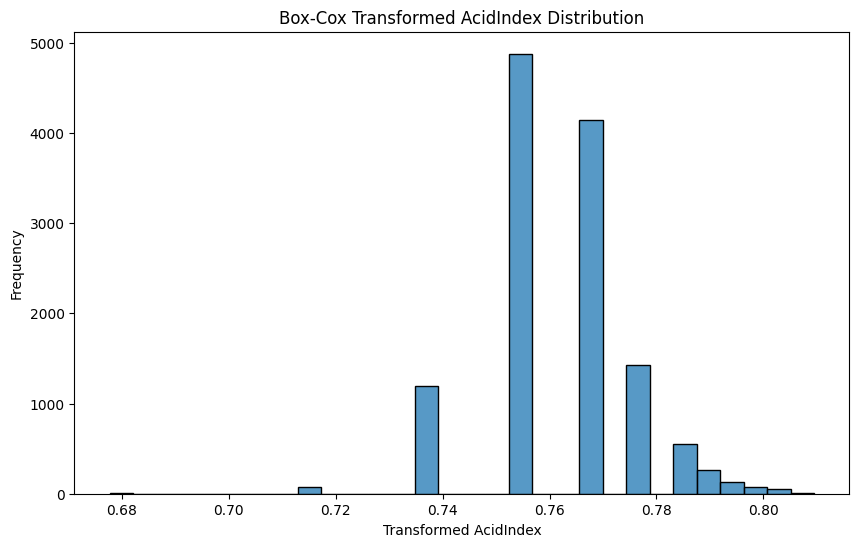

Box-Cox lambda value for AcidIndex: -1.1933368189397973


In [71]:
# Plot the Box-Cox transformed AcidIndex distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AcidIndex_boxcox'], bins=30)
plt.title('Box-Cox Transformed AcidIndex Distribution')
plt.xlabel('Transformed AcidIndex')
plt.ylabel('Frequency')
plt.show()

# Step 6: Check the lambda value used in the Box-Cox transformation
print(f"Box-Cox lambda value for AcidIndex: {fitted_lambda}")

Based on the visual plotted after the Box cox transformation below mentioned are the insights that are evident:

*   The graph shows a marked improvement in symmetry compared to the original graph, making it more apt for modeling.
*   The Box-Cox transformation has compressed the extreme AcidIndex values, reducing the impact of outliers.
*   The distribution has moved closer to a normal bell-curve, which is desirable for many analytical techniques, especially parametric models.
*   A lambda between -2 and 2 is considered a good indicator that the transformation is effective and appropriate for the data.



In [72]:
# Dropping AcidIndex Column as AcidIndex_boxcox is the transformed column.
df.drop(['AcidIndex'], axis = 1, inplace = True)

### EDA and Data Preperation on FixedAcidity

<Axes: >

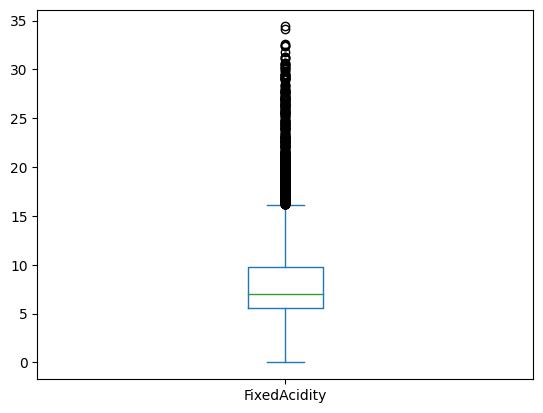

In [73]:
#Plotting BoxPlot for Fixed Acidity
df['FixedAcidity'].plot.box()

**Key Observations:**
- Median: The median value is approximately 7.0.
- Interquartile Range (IQR):
  - Q1 (25th percentile) is around 5.6
  - Q3 (75th percentile) is around 9.8
  - This represents the middle 50% of values.
- Whiskers: The whiskers extend from approximately 5 to 10, covering most data - points.
- Outliers: There are many outliers above 10, with some reaching up to 35.



In [74]:
#Creating new column after scaler fit transformation on 'FixedAcidity' as'FixedAcidity_StdScalar
df['FixedAcidity_StdScalar'] = scaler.fit_transform(df[['FixedAcidity']]).flatten()

### Prepped Data Review of FixedAcidity

<Axes: xlabel='FixedAcidity_StdScalar', ylabel='Count'>

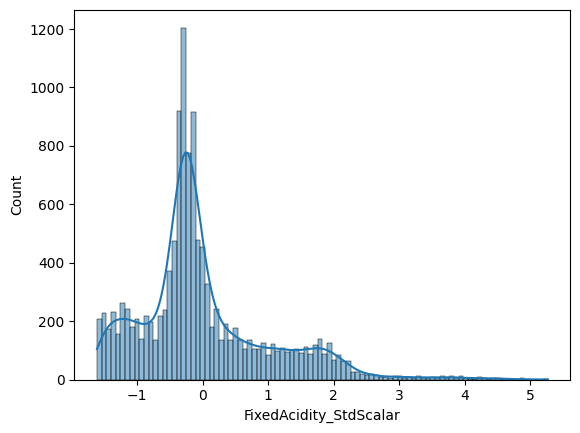

In [75]:
sns.histplot(df['FixedAcidity_StdScalar'], kde=True)

A histogram showing the distribution of FixedAcidity_StdScalar values. The x-axis ranges from approximately -2 to 5, with the y-axis (Count) ranging from 0 to 1200.

Key features:
- The distribution is right-skewed with a peak near 0.
- The highest bar reaches just above 1200 counts.
- There's a smooth blue line overlaying the histogram, representing a kernel density estimate.
- Most of the data is concentrated between -1 and 2 on the x-axis.
- The frequency drops off sharply for values above 2.


In [76]:
# Dropping 'FixedAcidity' column
df.drop('FixedAcidity', axis = 1, inplace = True)

##EDA for Citric Acid and Density

In [77]:
#Statistical summary of CitricAcid and Density
df[['CitricAcid', 'Density']].describe()

,CitricAcid,Density
count,12795.000000,12795.000000
mean,0.686315,0.994203
std,0.606005,0.026538
min,0.000000,0.888090
25%,0.280000,0.987720
50%,0.440000,0.994490
75%,0.970000,1.000515
max,3.860000,1.099240


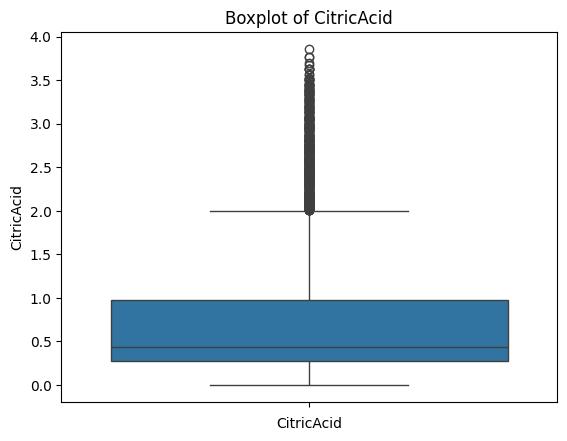

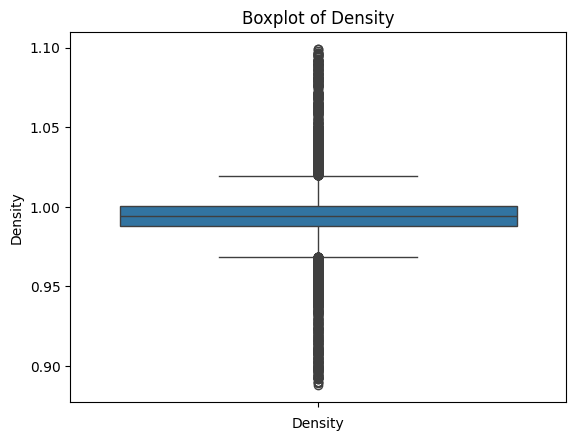

In [78]:
#Plotting Boxplot
for i in ['CitricAcid', 'Density']:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.title(f'Boxplot of {i}')
  plt.show();
  print('\n')

### Boxplot Analysis of CitricAcid and Density

#### 1. **Boxplot of CitricAcid**:
   - **Y-axis Range**: 0 to 4.0
   - The interquartile range (IQR) extends from approximately 0.3 to 1.0.
   - The **median** is around 0.5.
   - **Whiskers** extend from 0 to about 2.0.
   - Many **outliers** are present above the upper whisker, reaching up to 4.0.

#### 2. **Boxplot of Density**:
   - **Y-axis Range**: 0.90 to 1.10
   - The box is compact, indicating low variability.
   - The **median** is around 0.995.
   - **Whiskers** extend from about 0.97 to 1.02.
   - Outliers are present on both sides, with more on the upper side.
   - The most extreme outliers range from about 0.89 to 1.10


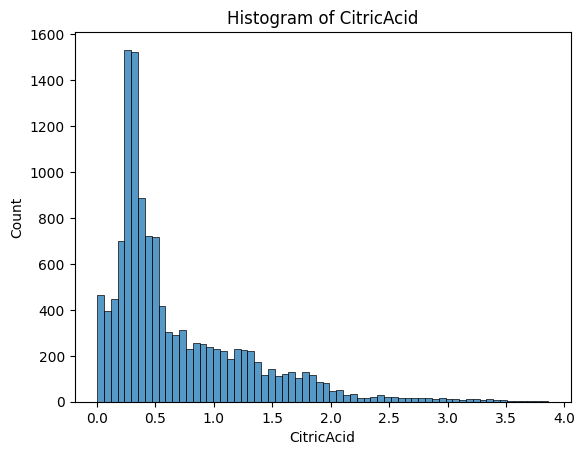

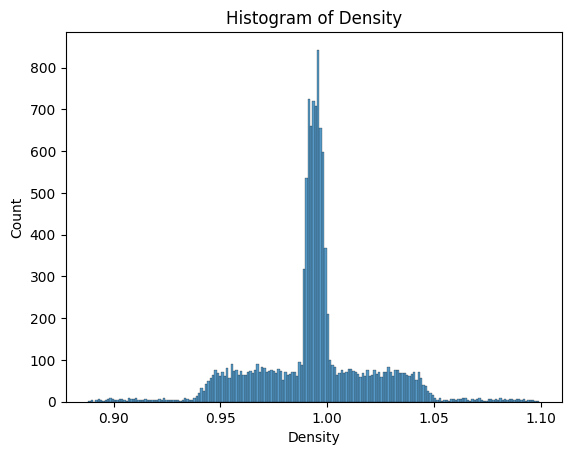

In [79]:
#Plotting Histogram for CitricAcid and Density
for i in ['CitricAcid', 'Density']:
  sns.histplot(df[i])
  plt.xlabel(i)
  plt.title(f'Histogram of {i}')
  plt.show();
  print('\n')

### Histogram Analysis of CitricAcid and Density

#### 1. **Histogram of CitricAcid**:
   - **X-axis**: CitricAcid values ranging from 0.0 to 4.0.
   - **Y-axis**: Count, ranging from 0 to 1600.
   - **Distribution**: Strongly right-skewed.
   - **Peak**: Highest bar around 0.3-0.4 CitricAcid value, with a count near 1500.
   - **Tail**: Long tail extending to the right, with counts rapidly decreasing after 1.0.
   - **Notable features**: Small peak around 0, followed by a rapid decline in frequency after the main peak.

#### 2. **Histogram of Density**:
   - **X-axis**: Density values ranging from 0.90 to 1.10.
   - **Y-axis**: Count, ranging from 0 to about 850.
   - **Distribution**: Roughly symmetric, but with a very sharp peak.
   - **Peak**: Extremely high and narrow peak at the density value of 1.00, with a count exceeding 800.
   - **Spread**: Most data is concentrated between 0.995 and 1.005.
   - **Tails**: Small tails on both sides, with slightly more data on the right side.
   - **Notable features**: The distribution resembles a normal distribution with an unusually high central peak.


**Note:**
Based on research, the **citric acid** range for wine should be between **0.0 and 8.0 g/L**, and the **density** range should be around **0.9 to 1.1 g/cm³**. In our dataset, the values for both **citric acid** and **density** fall well within these acceptable ranges. Therefore, no data transformation is required for these variables.

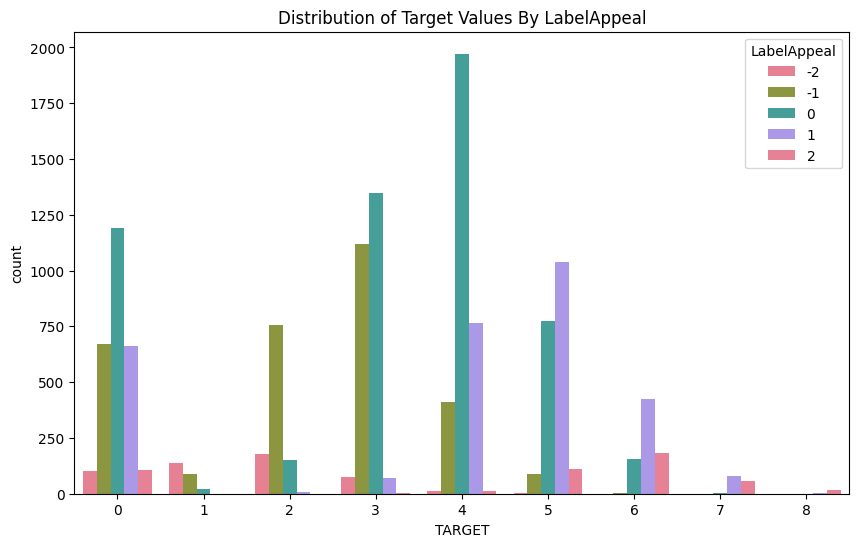

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(df, x="TARGET", hue="LabelAppeal", palette='husl')
plt.xlabel('TARGET');
plt.title('Distribution of Target Values By LabelAppeal');
plt.show()

### Key Observations:
- The majority of the data is concentrated around 0 and 1, especially for target variable.
- Target 4 is the standout, that reflect high frequency in the dataset.
- LabelAppeal 1 and 2 looks to have higher target values, indicating higher appeal may correspond to higher target scores.

### Overall analysis on transformed Dataset

In [81]:
!pip install plotly

In [82]:
# Code inferred from plotly.com
#Please install plotly package in kernel 
# step - 1 conda create --name='env'
# step - 2 conda activate env 
# step - 3 pip install --upgrade plotly jupyterlab
# step - 4 pip -m ipykernel install --user --name=env
# step - 5 select this created env to view this plot 


import plotly.express as px

# Compute the correlation matrix
corr_matrix = df.corr()

# Generate an interactive heatmap using Plotly
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1,
                title="Correlation Matrix of Features After Data Cleaning")

# Update layout for better readability
fig.update_layout(
    title={
        'text': "Correlation Matrix of Features After Data Cleaning",
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    height=600,
    width=800)

# Show the Plotly figure
fig.show()


### **Key Observations:**
- Strong positive correlations appear between some of the star ratings (1_Star, 2_Star, etc.)
- The TARGET variable shows some positive correlation with LabelAppeal and negative correlation with VolatileAcidity
- Most features show relatively weak correlations with each other, as indicated by the prevalence of light colors in the matrix


### Saving the Transformed Dataset to CSV

In [83]:
df.to_csv("Transformed_M3_Data.csv");

### Conclusion

This assignment focuses on cleaning and preparing the dataset of wines  including missing values and inconsistencies. It had several data integrity issues. Key steps included:

  - **Exploratory Data Analysis (EDA):** Issues such as missing data in several columns (e.g., STARS, Sulphates, Alcohol, ResidualSugar, Chlorides, pH) and inconsistencies in FreeSulfurDioxide and TotalSulfurDioxide were identified.

  - **Data Cleaning:** Techniques like median imputation were used to handle missing values in highly skewed variables, such as ResidualSugar. Certain variables, like FreeSulfurDioxide, were dropped due to logical inconsistencies.

  - **Transformations:** Several variables, including TotalSulfurDioxide and ResidualSugar, underwent log transformations to reduce skewness. Capping outliers in Chlorides and scaling features such as FixedAcidity improved data normalization.For some columns there was no transformation required as the data was within acceptable ranges.

  - **Outcome:** After the data preparation, the dataset is ready for further modeling and analysis. Missing values were handled, variables were transformed, and the dataset was cleaned for more robust analysis.
  

After data cleaning we significantly improved the dataset's usability, ensuring that it is well-prepared for machine learning models.